# Hometask 1

**Задание 1.** Попробуйте видоизменить параметры двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, эпох, слоев).

**Задание 2.** Проведите анализ - что приводит к ухудшению нейронной сети? Что приводит к увеличению ее точности?

### Исходный вариант

Исходный варинт кода, чтобы было на что ориентироваться

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Iter 9999
Iter 19999
Iter 29999
Iter 39999
Iter 49999
Iter 59999
Iter 69999
Iter 79999
Iter 89999
Iter 99999


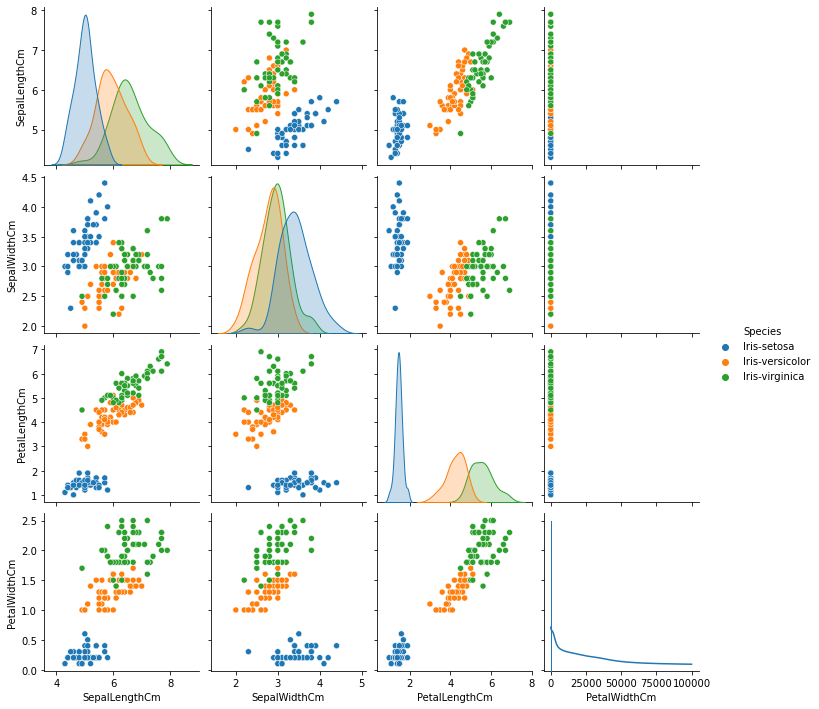

Точность нейронной сети 92.95%


In [1]:
'''
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("./Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
   
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    
    if (i + 1) % 10000 == 0:
        print('Iter {}'.format(i))


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Первый тест показывает `Точность нейронной сети 93.24%`. В исходном ноутбуке при 100 тыс. итераций обучения было чуть больше 95%. Похоже, что всё зависит от первоначальных весов.

## Задание 1

Задача: Попробуйте видоизменить параметры двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, эпох, слоев).

Первых два шага из оригинального варианта так и останутся. А вот третий и четвёртый необходимо модицифировать для удобства внесения изменений.

In [2]:
def step_3_v2(learning_rate=0.001, iterations=100000, hidden_layers=(), iter_debug=False):
    ### Шаг 3. Обученние нейронной сети
    # присваевание случайных весов
    w = [None] * (1 + len(hidden_layers))
    prev_size = 4 # in layer size
    for i in range(len(w) - 1):
        w[i] = 2*np.random.random((prev_size, hidden_layers[i])) - 1
        prev_size = hidden_layers[i]
    w[-1] = 2*np.random.random((prev_size, 3)) - 1
    # w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
    # w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # скорость обучения (learning rate)
    n = learning_rate

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(iterations): #100,000

        # прямое распространение(feed forward)
        # layer0 = X_train
        # layer1 = sigmoid(np.dot(layer0, w0))
        # layer2 = sigmoid(np.dot(layer1, w1))
        
        layers = [None] * (2 + len(hidden_layers))
        layers[0] = X_train
        for j in range(1, len(layers)):
            layers[j] = sigmoid(np.dot(layers[j - 1], w[j - 1]))

        # обратное распространение(back propagation) с использованием градиентного спуска
#         layer2_error = y_train - layer2
#         layer2_delta = layer2_error * sigmoid_deriv(layer2)

#         layer1_error = layer2_delta.dot(w1.T)
#         layer1_delta = layer1_error * sigmoid_deriv(layer1)

        layer_error = y_train - layers[-1]
        error = np.mean(np.abs(layer_error))
        layers_delta = [None] * len(layers)
        layers_delta[-1] = layer_error * sigmoid_deriv(layers[-1])
        for j in range(len(layers) - 2, 0, -1):
            layer_error = layers_delta[j + 1].dot(w[j].T)
            layers_delta[j] = layer_error * sigmoid_deriv(layers[j])
        
        # w1 += layer1.T.dot(layer2_delta) * n
        # w0 += layer0.T.dot(layer1_delta) * n
        
        for j in range(len(w)):
            w[j] += layers[j].T.dot(layers_delta[j + 1]) * n

        # error = np.mean(np.abs(layer2_error))
        errors.append(error)
        # accuracy = (1 - error) * 100

        if iter_debug and (i + 1) % 10000 == 0:
            print('Iter {}'.format(i))
    
    accuracy = (1 - errors[-1]) * 100
    return errors, accuracy

In [3]:
def step_4(errors, accuracy, show_plt=True):
    ### Шаг 4. Демонстрация полученных результатов
    # черчение диаграммы точности в зависимости от обучения
    if show_plt:
        plt.plot(errors)
        plt.xlabel('Обучение')
        plt.ylabel('Ошибка')
        plt.show() # расскоментируйте, чтобы посмотреть 

    print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

Проверка работоспособности сети с настройками по умолчанию.

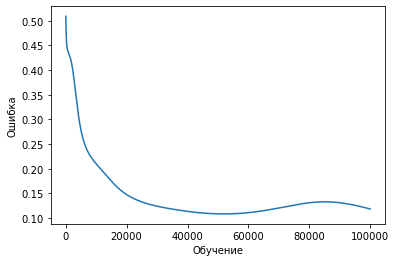

Точность нейронной сети 88.15%


In [4]:
errors, accuracy = step_3_v2(hidden_layers=[5])
# print(error, accuracy)
step_4(errors, accuracy)

Как видно, если инициализация весов случайными числами изменяется, то можно получить отличный результат от первоначального.

1. Поэкспериментирует с количством нейронов в скрытом слое.

In [5]:
%%time
for i in range(2, 10):
    print('Network layers: 4, {}, 3'.format(i))
    error, accuracy = step_3_v2(hidden_layers=[i])
    step_4(error, accuracy, show_plt=False)

Network layers: 4, 2, 3
Точность нейронной сети 78.59%
Network layers: 4, 3, 3
Точность нейронной сети 92.05%
Network layers: 4, 4, 3
Точность нейронной сети 93.51%
Network layers: 4, 5, 3
Точность нейронной сети 95.39%
Network layers: 4, 6, 3
Точность нейронной сети 95.44%
Network layers: 4, 7, 3
Точность нейронной сети 94.95%
Network layers: 4, 8, 3
Точность нейронной сети 94.68%
Network layers: 4, 9, 3
Точность нейронной сети 94.45%
CPU times: user 1min 8s, sys: 38.8 ms, total: 1min 8s
Wall time: 1min 8s


Как видно, при одном скрытом слое и случайной инициализации весов увелические нейронов не всегда приводит к увеличению точности. При этом значительное увеличение нейронов приводит к увеличению точности.

2. Эксперимент с числом эпох.

Возьмём 5 скрытых нейронов по умолчанию.

In [6]:
%%time
for i in range(1, 10):
    print('Number of iterations {}'.format(50000 * i))
    error, accuracy = step_3_v2(iterations=50000 * i, hidden_layers=[5])
    step_4(error, accuracy, show_plt=False)

Number of iterations 50000
Точность нейронной сети 92.19%
Number of iterations 100000
Точность нейронной сети 94.85%
Number of iterations 150000
Точность нейронной сети 95.83%
Number of iterations 200000
Точность нейронной сети 96.22%
Number of iterations 250000
Точность нейронной сети 94.83%
Number of iterations 300000
Точность нейронной сети 97.25%
Number of iterations 350000
Точность нейронной сети 97.42%
Number of iterations 400000
Точность нейронной сети 97.69%
Number of iterations 450000
Точность нейронной сети 97.83%
CPU times: user 3min 16s, sys: 320 ms, total: 3min 16s
Wall time: 3min 16s


По скачкам результатов в первых экспериментах становится ясно, что случайные значения весов вносят свой вклад на небольшом количетсве эпох. Правда, с увеличением всеже отмечается улучшение обучения. А со значительным увеличением эпох, это сказывается на десятые доли процента.

3. Эксперимент со скоростью обучения.

Количество эпох возьмём 250 тыс., чтобы точно быть уверенным, что выжали почти максимум из возможного.

In [7]:
%%time
for i in (0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1):
    print('Learning rate {}'.format(i))
    error, accuracy = step_3_v2(iterations=250000, learning_rate=i, hidden_layers=[5])
    step_4(error, accuracy, show_plt=False)

Learning rate 1e-06
Точность нейронной сети 56.07%
Learning rate 1e-05
Точность нейронной сети 63.92%
Learning rate 0.0001
Точность нейронной сети 86.37%
Learning rate 0.001
Точность нейронной сети 96.84%
Learning rate 0.01
Точность нейронной сети 96.88%
Learning rate 0.1
Точность нейронной сети 98.23%
CPU times: user 2min 13s, sys: 92.2 ms, total: 2min 13s
Wall time: 2min 13s


По полученным результатам видно, что чем меньше скорость обучения тем меньше за указанное количество эпох обучается сеть. На удивление скорость обучения 0,1 иногда дает лучший результат.

4. Эксперимент с добавлением скрытых слоев.

Добавим от 1 до 3 кастомных скрытых слоев, к тому что уже есть. Скорость обучения поставим 0,0005, чтобы легче интерпретировать результаты.

In [8]:
%%time
from itertools import combinations_with_replacement
mass = (3, 5, 7)
combs1 = combinations_with_replacement(mass, 1)
combs2 = combinations_with_replacement(mass, 2)
combs3 = combinations_with_replacement(mass, 3)

for i in (combs1, combs2, combs3):
    for it in i:
        print('Network layers: 4, {}, 3'.format(it))
        error, accuracy = step_3_v2(learning_rate=0.0005, hidden_layers=tuple(it))
        step_4(error, accuracy, show_plt=False)

Network layers: 4, (3,), 3
Точность нейронной сети 85.0%
Network layers: 4, (5,), 3
Точность нейронной сети 92.61%
Network layers: 4, (7,), 3
Точность нейронной сети 93.24%
Network layers: 4, (3, 3), 3
Точность нейронной сети 81.78%
Network layers: 4, (3, 5), 3
Точность нейронной сети 94.23%
Network layers: 4, (3, 7), 3
Точность нейронной сети 73.24%
Network layers: 4, (5, 5), 3
Точность нейронной сети 95.88%
Network layers: 4, (5, 7), 3
Точность нейронной сети 79.69%
Network layers: 4, (7, 7), 3
Точность нейронной сети 95.71%
Network layers: 4, (3, 3, 3), 3
Точность нейронной сети 79.48%
Network layers: 4, (3, 3, 5), 3
Точность нейронной сети 78.46%
Network layers: 4, (3, 3, 7), 3
Точность нейронной сети 97.69%
Network layers: 4, (3, 5, 5), 3
Точность нейронной сети 90.16%
Network layers: 4, (3, 5, 7), 3
Точность нейронной сети 95.93%
Network layers: 4, (3, 7, 7), 3
Точность нейронной сети 96.1%
Network layers: 4, (5, 5, 5), 3
Точность нейронной сети 90.0%
Network layers: 4, (5, 5, 7)

Хорошо интерпретируемые результаты. Чем больше нейронов в слое, тем лучше/быстрее обучается сеть.

## Задание 2

Задача. Проведите анализ - что приводит к ухудшению нейронной сети? Что приводит к увеличению ее точности?

К ухудшению приводит:

- малое количество нейронов (при недлительном обучении);
- низкая/высокая скорость обучения (можно попасть в локальный минимум и не попасть в глобальный, либо вообще не попасть в минимум и проскакивать его);
- недостаточное количество эпох обучения;
- отсутствие или не достаточноые количество скрытых слоев.

К улучшению точности:

- достаточное количество нейронов (надо подбирать, т.к. если сразу ставить много - это приведёт к большому времени обучения);
- преемлемая или лучше адаптивная скорость обучения (например если знак производной меняется, то уменьшить скорость обучения, хотя и в этом случае можно попасть в локальный минимум, а не в глобальный);
- большое количество эпох обучения (надо следить, чтобы не переобучилась на валидационной выборке);
- оптимальное количество скрытых слоев (если слишком много, то слишком долго обучать, да и функция активации может стать слишком маленькой цифрой, если делать очень глубокую сеть).